In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_curve
import joblib


data.pd.read_csv('D:\HocMay/archive/hypothyroid.csv');

In [2]:
data = pd.read_csv('D:/HocMay/archive/hypothyroid.csv')

In [3]:
data.head()
data.tail()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measfured,TBG,referral source,binaryClass
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,P


In [10]:
data.tail()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,P


In [11]:
data.shape

(3772, 30)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [13]:
data.describe

<bound method NDFrame.describe of      age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     41   F            f                  f                         f    f   
1     23   F            f                  f                         f    f   
2     46   M            f                  f                         f    f   
3     70   F            t                  f                         f    f   
4     70   F            f                  f                         f    f   
...   ..  ..          ...                ...                       ...  ...   
3767  30   F            f                  f                         f    f   
3768  68   F            f                  f                         f    f   
3769  74   F            f                  f                         f    f   
3770  72   M            f                  f                         f    f   
3771  64   F            f                  f                         f    f   

     pregnant thy

In [14]:
le = LabelEncoder()               # Tạo một đối tượng LabelEncoder
for x in data.columns:            # Duyệt qua từng cột trong DataFrame
    data[x] = le.fit_transform(data[x])  # Mã hóa dữ liệu của cột đó
data.info()                       # Hiển thị thông tin về DataFrame sau khi mã hóa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int64
 1   sex                        3772 non-null   int64
 2   on thyroxine               3772 non-null   int64
 3   query on thyroxine         3772 non-null   int64
 4   on antithyroid medication  3772 non-null   int64
 5   sick                       3772 non-null   int64
 6   pregnant                   3772 non-null   int64
 7   thyroid surgery            3772 non-null   int64
 8   I131 treatment             3772 non-null   int64
 9   query hypothyroid          3772 non-null   int64
 10  query hyperthyroid         3772 non-null   int64
 11  lithium                    3772 non-null   int64
 12  goitre                     3772 non-null   int64
 13  tumor                      3772 non-null   int64
 14  hypopituitary           

In [15]:
    data = data.drop_duplicates() # loai bỏ tất cả các dữ liệu trùng lặp
    data.duplicated().sum()       # Thống kê lại dữ liệu trùng lặp

np.int64(0)

In [16]:
scaler = MinMaxScaler()                            # Khởi tạo scale
data['age'] = scaler.fit_transform(data[['age']])  # Chuẩn hóa data cột Age
data['TT4'] = scaler.fit_transform(data[['TT4']])  # Chuẩn hóa data cột TT4
data['T4U'] = scaler.fit_transform(data[['T4U']])  # Chuẩn hóa data cột T4U
data['FTI'] = scaler.fit_transform(data[['FTI']])  # Chuẩn hóa data cột FTI
data.head()

C:\Users\dinhh\AppData\Local\Temp\ipykernel_35568\2850093415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = scaler.fit_transform(data[['age']])  # Chuẩn hóa data cột Age
C:\Users\dinhh\AppData\Local\Temp\ipykernel_35568\2850093415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TT4'] = scaler.fit_transform(data[['TT4']])  # Chuẩn hóa data cột TT4
C:\Users\dinhh\AppData\Local\Temp\ipykernel_35568\2850093415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,0.365591,1,0,0,0,0,0,0,0,0,...,1,0.116183,1,0.493151,1,0.042735,0,0,1,1
1,0.161290,1,0,0,0,0,0,0,0,0,...,1,0.012448,0,1.000000,0,1.000000,0,0,4,1
2,0.430108,2,0,0,0,0,0,0,0,0,...,1,0.041494,1,0.328767,1,0.094017,0,0,4,1
3,0.720430,1,1,0,0,0,0,0,0,0,...,1,0.344398,0,1.000000,0,1.000000,0,0,4,1
4,0.720430,1,0,0,0,0,0,0,0,0,...,1,0.834025,1,0.301370,1,0.850427,0,0,3,1


In [17]:
# Tạo biến X bằng cách loại bỏ cột 'binaryClass' khỏi DataFrame data
X = data.drop('binaryClass', axis=1)  
# Tạo biến y bằng cách lấy cột 'binaryClass' từ DataFrame data
y = data['binaryClass']  
# test_size=0.3: 30% dữ liệu dùng để kiểm tra
# random_state=0: đảm bảo kết quả chia dữ liệu luôn giống nhau khi chạy lại
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [18]:
#model svc
svc_model = SVC(C=1, kernel="linear", )
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_svc))

Accuracy: 0.9156193895870736
              precision    recall  f1-score   support

           0       0.74      0.16      0.27       105
           1       0.92      0.99      0.96      1009

    accuracy                           0.92      1114
   macro avg       0.83      0.58      0.61      1114
weighted avg       0.90      0.92      0.89      1114



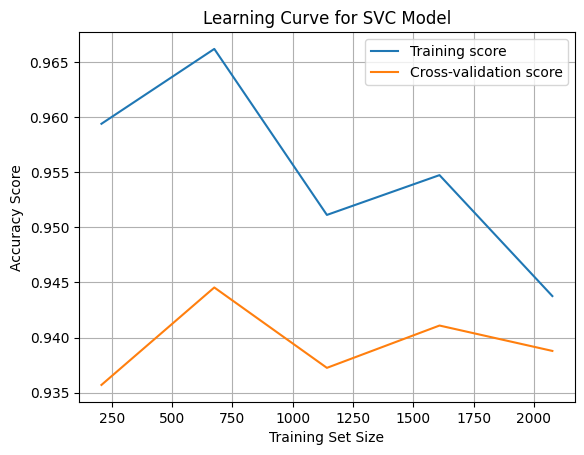

In [19]:
# Tạo Learning Curve
train_sizes, train_scores, test_scores = learning_curve(svc_model, X_train, y_train, cv=5, n_jobs=-1)

# Tính điểm trung bình của tập huấn luyện và kiểm tra
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Vẽ biểu đồ
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for SVC Model')
plt.legend()
plt.grid()
plt.show()

In [20]:
#tree_model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_tree)
print("Accuracy (Decision Tree):", accuracy_dt)
print(classification_report(y_test, y_pred_tree))

Accuracy (Decision Tree): 0.9371633752244165
              precision    recall  f1-score   support

           0       0.86      0.40      0.55       105
           1       0.94      0.99      0.97      1009

    accuracy                           0.94      1114
   macro avg       0.90      0.70      0.76      1114
weighted avg       0.93      0.94      0.93      1114



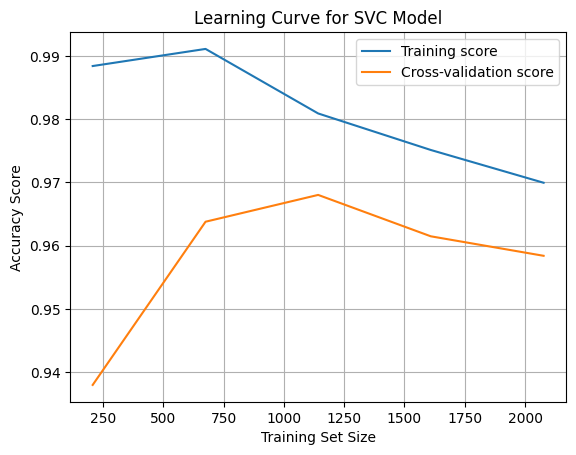

In [22]:
# Tạo Learning Curve
train_sizes, train_scores, test_scores = learning_curve(tree_model, X_train, y_train, cv=5, n_jobs=-1)

# Tính điểm trung bình của tập huấn luyện và kiểm tra
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Vẽ biểu đồ
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for SVC Model')
plt.legend()
plt.grid()
plt.show()